In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
train_data= pd.read_csv('train_data_iitm.csv')   
train_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
0,2.0,2020-06-10 13:36:49,2020-06-10 13:51:08,1.0,2.73,1.0,N,224,148,2.0,12.00,2.5
1,NaN,2020-06-13 06:19:00,2020-06-13 06:37:00,NaN,11.58,NaN,NaN,56,42,NaN,28.81,0.0
2,2.0,2020-06-20 07:59:23,2020-06-20 08:05:39,1.0,2.05,1.0,N,79,68,2.0,8.00,2.5
3,1.0,2020-06-27 15:11:32,2020-06-27 15:15:02,1.0,1.40,1.0,N,236,75,1.0,6.00,2.5
4,1.0,2020-06-26 16:00:36,2020-06-26 16:02:28,1.0,0.60,1.0,N,186,90,2.0,4.00,2.5


In [3]:
train_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
count,54365.000000,54365.000000,60000.000000,54365.000000,60000.000000,60000.000000,54365.000000,60000.000000,60000.000000
mean,1.597554,1.353702,3.368568,1.047383,157.733683,153.572183,1.373604,13.626738,1.965417
std,0.490395,1.012809,4.323149,1.078021,69.510520,73.940982,0.532802,13.454365,1.048347
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-149.000000,-2.500000
25%,1.000000,1.000000,1.010000,1.000000,107.000000,87.000000,1.000000,6.000000,2.500000
50%,2.000000,1.000000,1.850000,1.000000,151.000000,151.000000,1.000000,9.000000,2.500000
75%,2.000000,1.000000,3.670000,1.000000,234.000000,233.000000,2.000000,15.500000,2.500000
max,2.000000,6.000000,114.300000,99.000000,265.000000,265.000000,5.000000,400.000000,2.500000


In [4]:
train_data.isnull().sum()

VendorID                 5635
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          5635
trip_distance               0
RatecodeID               5635
store_and_fwd_flag       5635
PULocationID                0
DOLocationID                0
payment_type             5635
fare_amount                 0
congestion_surcharge        0
dtype: int64

In [5]:
print(len(train_data.loc[train_data.fare_amount <0]))
train_data = train_data.loc[train_data.fare_amount >0]

294


In [6]:
train_data = train_data.loc[train_data.congestion_surcharge >=0.0]

In [7]:
train_data = train_data.loc[train_data.RatecodeID <= 6 ]

In [8]:
train_data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
congestion_surcharge     0
dtype: int64

In [9]:
train_data.shape

(54043, 12)

Around 300 row data where removed, which is 0.6% of the total rows 

In [10]:
train_data = train_data.drop('store_and_fwd_flag',axis=1)
train_data = train_data.drop('VendorID',axis=1)

In [15]:
def time_features_pickup(df,time_col):                                  
    df[time_col] = pd.to_datetime(df[time_col])
    df['dayofweek'] = pd.to_datetime(df[time_col]).dt.dayofweek
    df['month'] = pd.to_datetime(df[time_col]).dt.month
    df['pickup_hour'] = pd.to_datetime(df[time_col]).dt.hour
    df['pickup_minute'] = pd.to_datetime(df[time_col]).dt.minute
    return df

def time_features_drop(df,time_col):
    df[time_col] = pd.to_datetime(df[time_col])
    df['drop_hour'] = pd.to_datetime(df[time_col]).dt.hour
    df['drop_minute'] = pd.to_datetime(df[time_col]).dt.minute
    return df

def time_difference(df):
    df['time_in_minutes'] = 60*(df['drop_hour']-df['pickup_hour'])+(df['drop_minute']-df['pickup_minute'])
    f=['pickup_hour','pickup_minute','drop_hour','drop_minute']
    df = df.drop(f,axis=1)
    return df

In [20]:
train_data = time_features_pickup(train_data,'tpep_pickup_datetime')
train_data = time_features_drop(train_data,'tpep_dropoff_datetime')
train_data = time_difference(train_data)
train_data = train_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1)

In [21]:
train_data.shape

(54043, 11)

In [22]:
train_data.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,dayofweek,month,time_in_minutes
0,1.0,2.73,1.0,224,148,2.0,12.0,2.5,2,6,15
2,1.0,2.05,1.0,79,68,2.0,8.0,2.5,5,6,6
3,1.0,1.40,1.0,236,75,1.0,6.0,2.5,5,6,4
4,1.0,0.60,1.0,186,90,2.0,4.0,2.5,4,6,2
5,1.0,4.00,1.0,137,236,1.0,15.0,2.5,2,6,13


# Checking for Outliers

C:\Users\tanur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


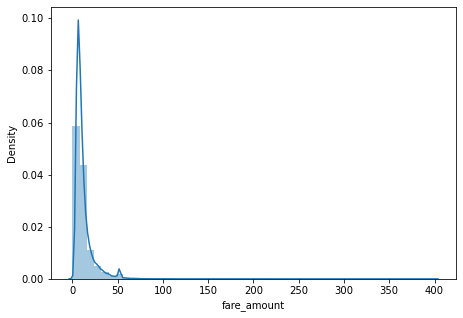

In [23]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sb.distplot(train_data['fare_amount'])
plt.show()

C:\Users\tanur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

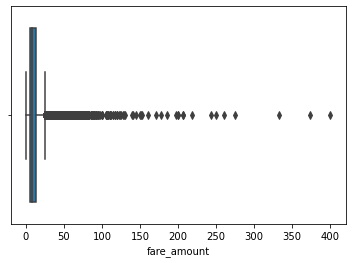

In [25]:
sb.boxplot(train_data['fare_amount'])

In [26]:
percentile25 = train_data['fare_amount'].quantile(0.25)
percentile75 = train_data['fare_amount'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [28]:
df_train = train_data[train_data['fare_amount'] < upper_limit]
train_data.shape[0]-df_train.shape[0]

4758

C:\Users\tanur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tanur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


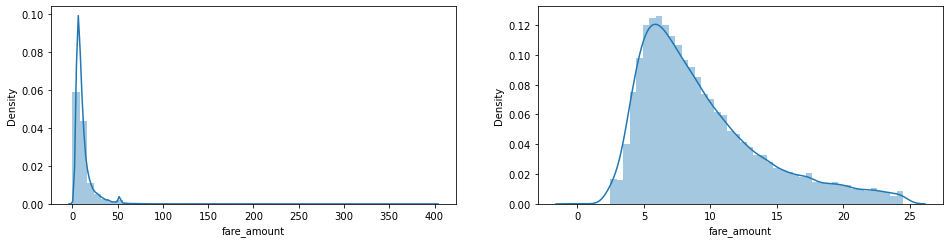

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.distplot(train_data['fare_amount'])
plt.subplot(2,2,2)
sb.distplot(df_train['fare_amount'])
plt.show()

In [41]:
y = df_train["fare_amount"]
x = df_train.drop(["fare_amount"],axis = 1)

<AxesSubplot:>

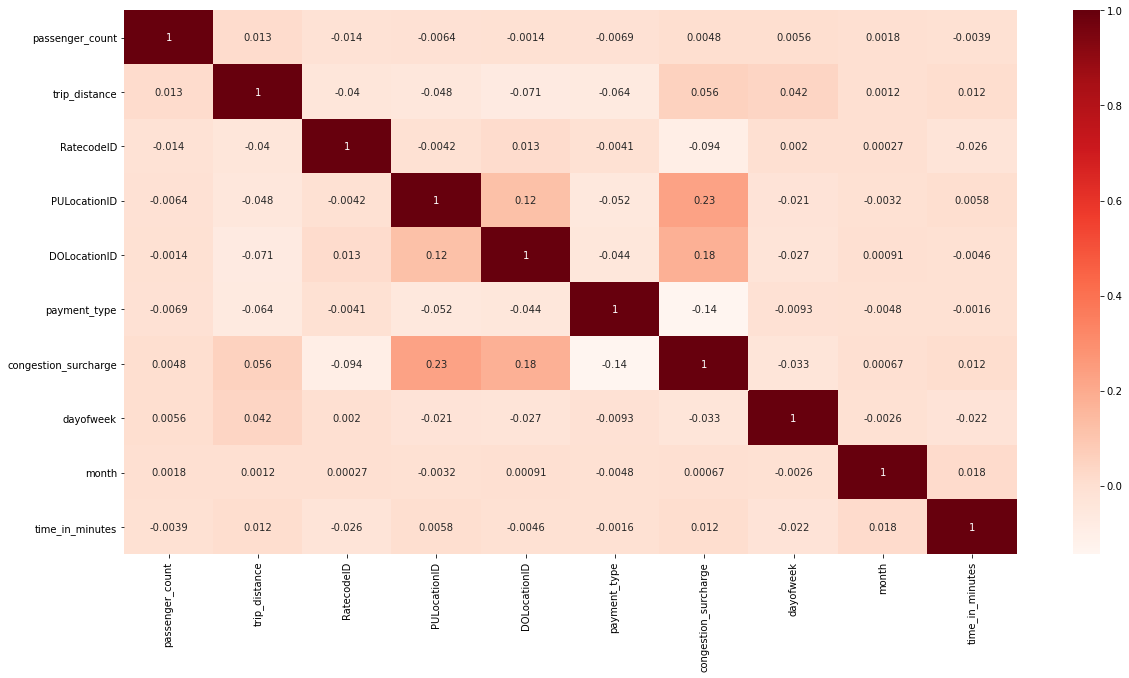

In [42]:
pearson_corr = x.corr()
plt.figure(figsize = (20,10))
sb.heatmap(data = pearson_corr, cmap = "Reds", annot = True)

# Comparing Different Models

In [43]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("LinearRegression:")
print("Train Accuracy:",lr.score(x_train,y_train))
print("Test Accuracy:",lr.score(x_test,y_test))
print("Root Mean squared error:",mse(y_test, y_pred,squared=False),"\n")

LinearRegression:
Train Accuracy: 0.8273174080642185
Test Accuracy: 0.836764496645138
Root Mean squared error: 1.8853312625549403 



# Lasso

In [47]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print("Lasso:")
print("Train Accuracy:",reg.score(x_train,y_train))
print("Test Accuracy:",reg.score(x_test,y_test))
print("Root Mean squared error:",mse(y_test, y_pred,squared=False),"\n")

Lasso:
Train Accuracy: 0.820392987584516
Test Accuracy: 0.8327603440958107
Root Mean squared error: 1.9083146762553744 



# Decision Tree

In [48]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("DecisionTreeRegressor:")
print("Train Accuracy:",clf.score(x_train,y_train))
print("Test Accuracy:",clf.score(x_test,y_test))
print("Root Mean squared error:",mse(y_test, y_pred,squared=False),"\n")

DecisionTreeRegressor:
Train Accuracy: 0.9998510473325656
Test Accuracy: 0.959479868714645
Root Mean squared error: 0.939324780254914 



# Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(random_state=1)
reg2.fit(x_train,y_train)
y_pred_train=reg2.predict(x_train)
y_pred = reg2.predict(x_test)
print("RandomForestRegressor:")
print("Train Accuracy:",reg2.score(x_train,y_train))
print("Test Accuracy:",reg2.score(x_test,y_test))
print("Train Root Mean squared error:",mse(y_train, y_pred_train,squared=False))
print("Test Root Mean squared error:",mse(y_test, y_pred,squared=False),"\n")

RandomForestRegressor:
Train Accuracy: 0.9967248581032263
Test Accuracy: 0.9776695004465302
Train Root Mean squared error: 0.26886416908478816
Test Root Mean squared error: 0.697315914557406 



# Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor()
reg1.fit(x_train,y_train)
y_pred_train=reg1.predict(x_train)
y_pred = reg1.predict(x_test)
print("GradientBoostingRegressor:")
print("Train Accuracy:",reg1.score(x_train,y_train))
print("Test Accuracy:",reg1.score(x_test,y_test))
print("Train Root Mean squared error:",mse(y_train, y_pred_train,squared=False))
print("Test Root Mean squared error:",mse(y_test, y_pred,squared=False))

GradientBoostingRegressor:
Train Accuracy: 0.9812449585609005
Test Accuracy: 0.9771487325291277
Train Root Mean squared error: 0.6433938159504754
Test Root Mean squared error: 0.7054000798996618


# XGBoost

In [51]:
import xgboost as xgb
regx=xgb.XGBRegressor()
regx.fit(x_train,y_train)
y_pred_train=regx.predict(x_train)
y_pred = regx.predict(x_test)
print("xgboost:")
print("Train Accuracy:",regx.score(x_train,y_train))
print("Test Accuracy:",regx.score(x_test,y_test))
print("Train Root Mean squared error:",mse(y_train, y_pred_train,squared=False))
print("Test Root Mean squared error:",mse(y_test, y_pred,squared=False))

xgboost:
Train Accuracy: 0.9929153659067582
Test Accuracy: 0.9793718876870104
Train Root Mean squared error: 0.3954363425916135
Test Root Mean squared error: 0.6702087620537718


# LightGBM

In [52]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor()
gbm.fit(x_train,y_train)
y_pred_train=gbm.predict(x_train)
y_pred = gbm.predict(x_test)
print("lightgbm:")
print("Train Accuracy:",gbm.score(x_train,y_train))
print("Test Accuracy:",gbm.score(x_test,y_test))
print("Train Root Mean squared error:",mse(y_train, y_pred_train,squared=False))
print("Test Root Mean squared error:",mse(y_test, y_pred,squared=False))

lightgbm:
Train Accuracy: 0.98635787071663
Test Accuracy: 0.9781875449878544
Train Root Mean squared error: 0.5487303086597918
Test Root Mean squared error: 0.689179946407427


In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
learning_rate = ['0.05','0.1','0.2','0.3','0.4','0.5','0.6']
max_depth = [int(x) for x in np.linspace(5,30,6)]
subsample = [0.6,0.7,0.8]
min_child_weight = [3,4,5,6,7]

In [62]:
random_grid = {'n_estimators':n_estimators,
              'learning_rate':learning_rate,
              'max_depth':max_depth,
              'subsample':subsample,
              'min_child_weight':min_child_weight}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.6, 0.7, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [64]:
regressor = xgb.XGBRegressor()

In [65]:
xg_random = RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error')

In [66]:
xg_random.fit(x_train,y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate_parameters=None,
 

In [67]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 700,
 'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [68]:
y_pred = xg_random.predict(x_test)
print("Test Root Mean squared error:",mse(y_test, y_pred,squared=False))

Test Root Mean squared error: 0.6899524273009559
